In [2]:
import pandas as pd
import yfinance as yf
from model import StockPricePredictor

In [3]:
company_ticker = {
    'Apple': 'AAPL',
    'Google': 'GOOG',
    'Microsoft': 'MSFT',
    'Amazon': 'AMZN'
}

In [4]:
for key in company_ticker:
    data = yf.download(company_ticker[key], period="1mo")
    data.to_csv(f"data_{key}.csv", sep=',', encoding='utf-8', header=True, index=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Mean Squared Error: 2.5779037629621264
R2 Score: 0.42060541741594537
Predicted stock prices for the next 3 days:
 [[168.48059761]
 [168.38498744]
 [168.28937727]]


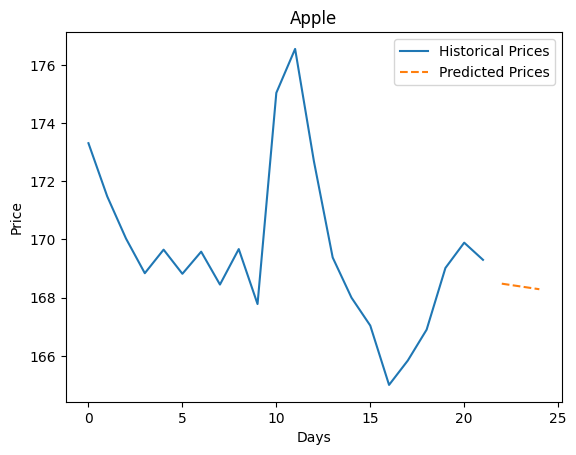

Mean Squared Error: 3.634253710236004
R2 Score: 0.46006331633789976
Predicted stock prices for the next 3 days:
 [[162.77840862]
 [163.21892498]
 [163.65944134]]


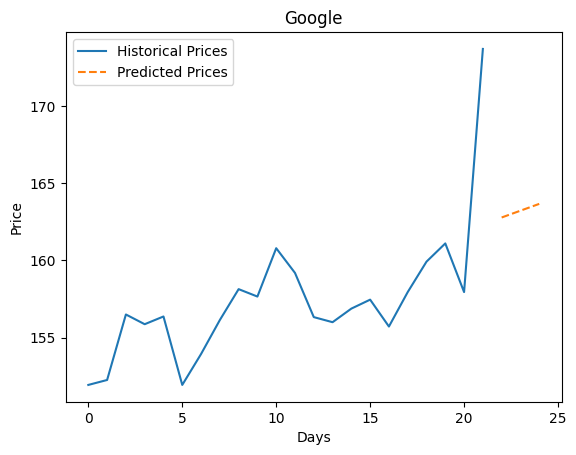

Mean Squared Error: 42.68208971159947
R2 Score: 0.25498605262433793
Predicted stock prices for the next 3 days:
 [[401.43266678]
 [400.15080738]
 [398.86894798]]


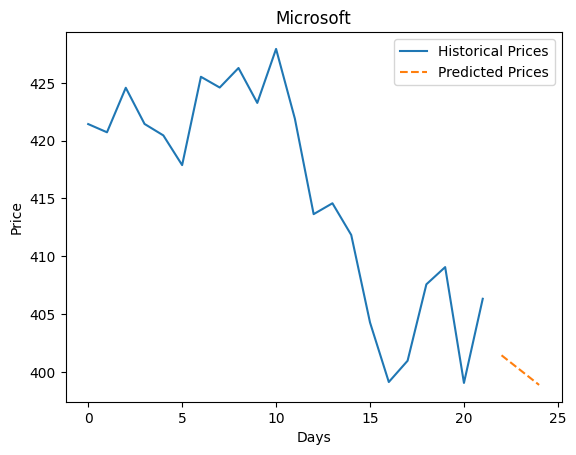

Mean Squared Error: 14.267896125186008
R2 Score: -1.3960566356686215
Predicted stock prices for the next 3 days:
 [[177.38404448]
 [177.01675979]
 [176.64947511]]


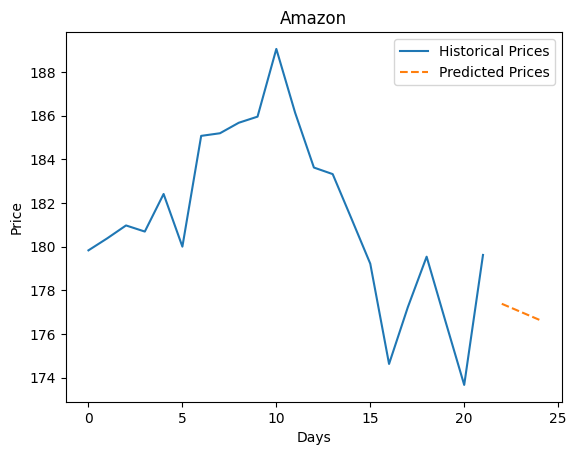

In [5]:
for key in company_ticker:
    df = pd.read_csv(f"data_{key}.csv")
    df.head()
    historical_prices = [100, 110, 120, 130, 140, 150, 160, 170, 180, 190]
    predictor = StockPricePredictor(df["Adj Close"])
    predictor.prepare_data()
    predictor.train_model()
    future_prices = predictor.predict_price(3)
    print("Predicted stock prices for the next 3 days:\n", future_prices)
    predictor.plot_prices(3, title= key)
